In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
## looks like there are lot of null values

In [8]:
# Checking number of unique values in each columns
count = 1
for x in df:
    print(f'{count}. {x}: {df[x].nunique()}')
    print(f'{df[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Date: 3004
2011-02-04    5
2011-02-14    5
2011-03-29    5
2011-05-25    5
2011-03-05    5
             ..
2013-05-07    1
2013-01-24    1
2013-04-12    1
2013-04-19    1
2013-01-05    1
Name: Date, Length: 3004, dtype: int64
----------

2. Location: 12
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
----------

3. MinTemp: 285
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
----------

4. MaxTemp: 331
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331, dtype: int64
----------

5. Rainfall: 250
0.0      5299
0.2       406
0.4       177


In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [10]:
cont_data = df.select_dtypes(exclude = ['object'] )
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


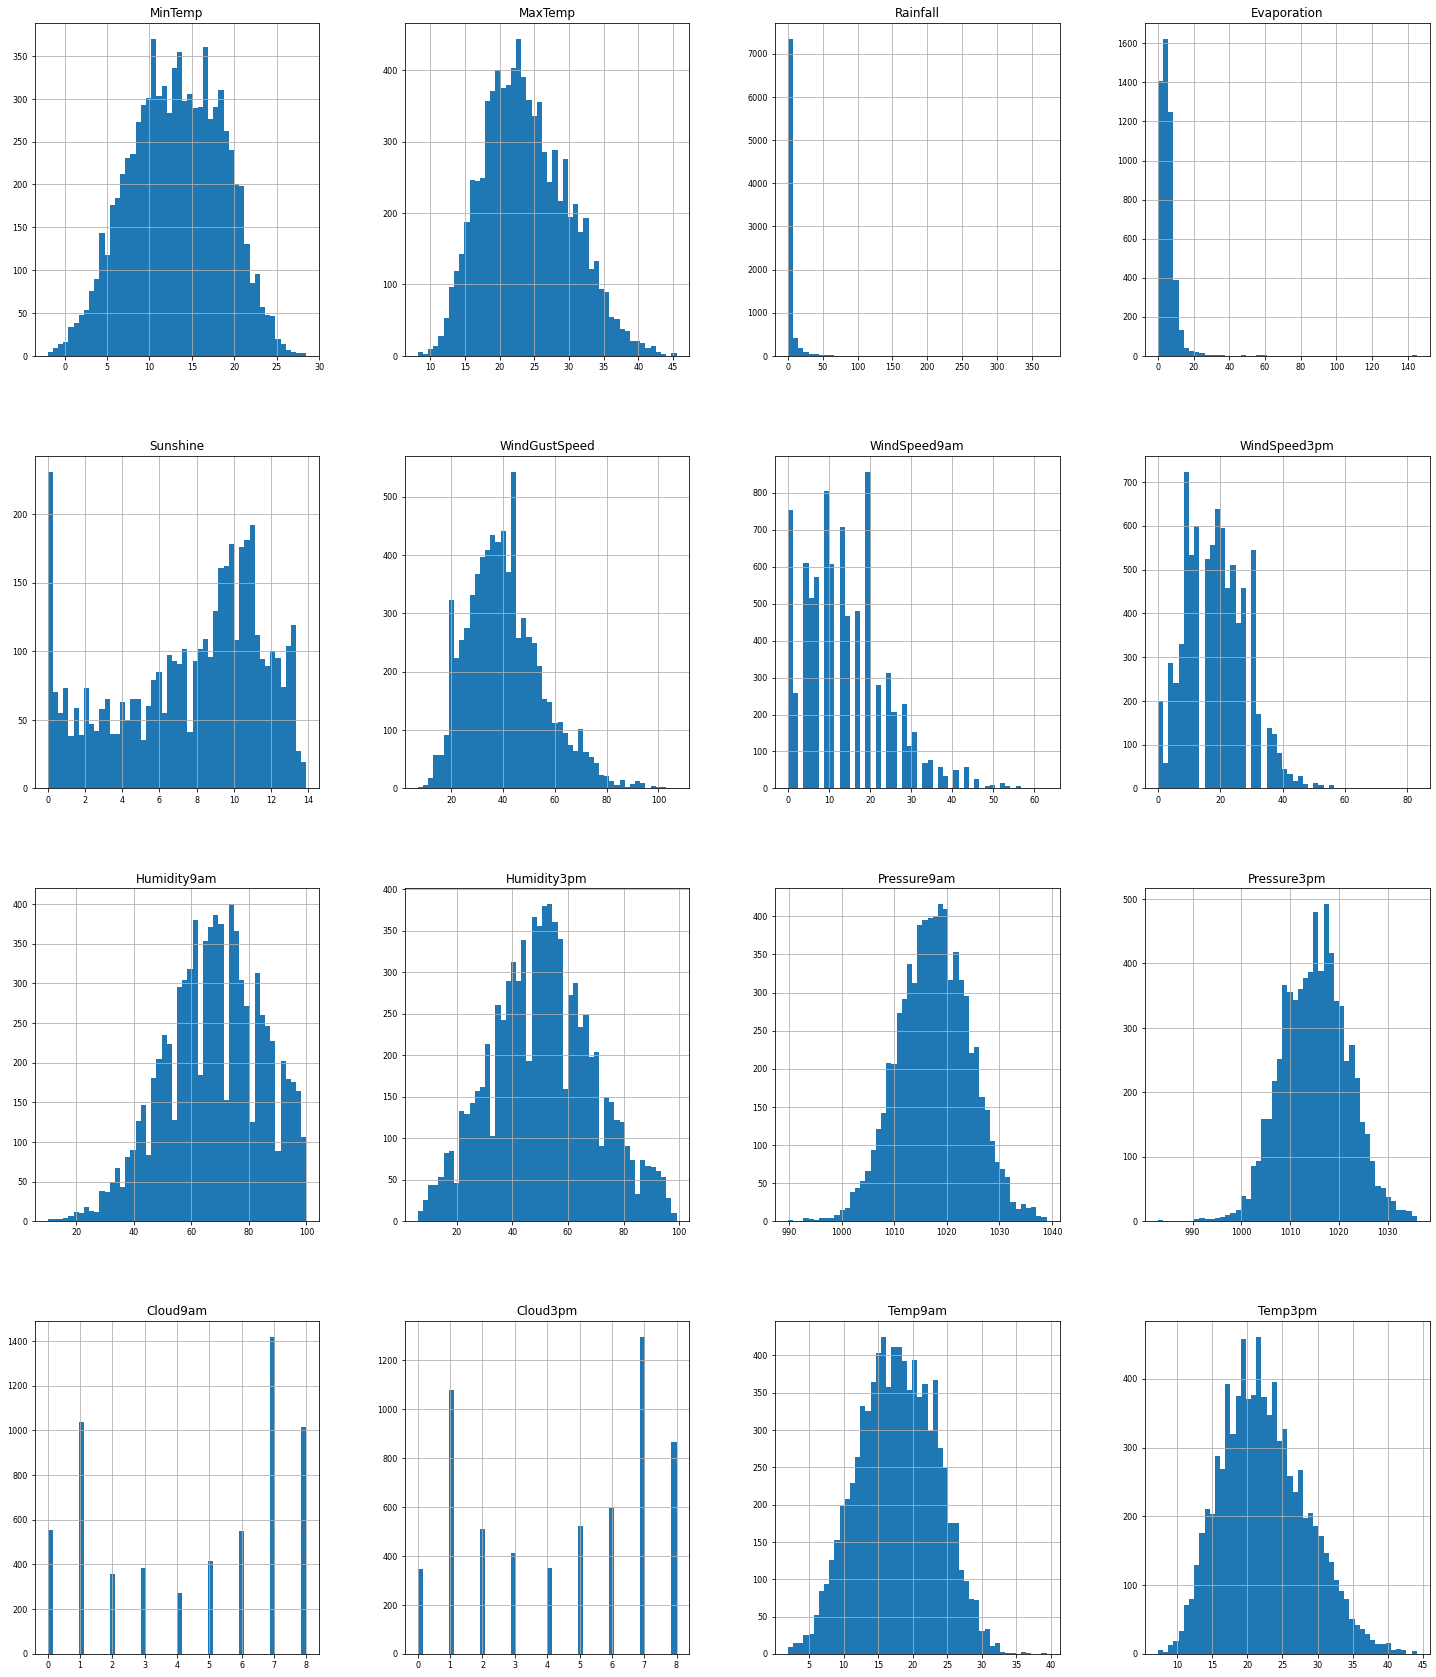

In [11]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

In [12]:
cont_data.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
dtype: int64

In [ ]:
## filling the null values using mean 

In [15]:
cont_data['MinTemp'].fillna(cont_data['MinTemp'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [16]:
cont_data['MaxTemp'].fillna(cont_data['MaxTemp'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [17]:
cont_data['Rainfall'].fillna(cont_data['Rainfall'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [18]:
cont_data['Evaporation'].fillna(cont_data['Evaporation'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [19]:
cont_data['Sunshine'].fillna(cont_data['Sunshine'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [20]:
cont_data['WindGustSpeed'].fillna(cont_data['WindGustSpeed'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [21]:
cont_data['WindSpeed3pm'].fillna(cont_data['WindSpeed3pm'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [22]:
cont_data['WindSpeed9am'].fillna(cont_data['WindSpeed9am'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [23]:
cont_data['Humidity9am'].fillna(cont_data['Humidity9am'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [24]:
cont_data['Humidity3pm'].fillna(cont_data['Humidity3pm'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [25]:
cont_data['Pressure9am'].fillna(cont_data['Pressure9am'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [26]:
cont_data['Pressure3pm'].fillna(cont_data['Pressure3pm'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [27]:
cont_data['Cloud9am'].fillna(cont_data['Cloud9am'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,NaN,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,NaN,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.0,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,NaN,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,NaN,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,NaN,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,NaN,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.0,15.1,26.0


In [28]:
cont_data['Cloud3pm'].fillna(cont_data['Cloud3pm'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [29]:
cont_data['Temp9am'].fillna(cont_data['Temp9am'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [30]:
cont_data['Temp3pm'].fillna(cont_data['Temp3pm'].mean(),inplace=True)
cont_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [31]:
cont_data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [32]:
## all the null values has been removed

In [34]:
##cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)

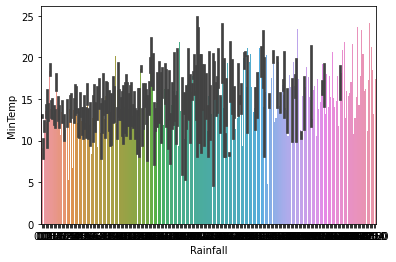

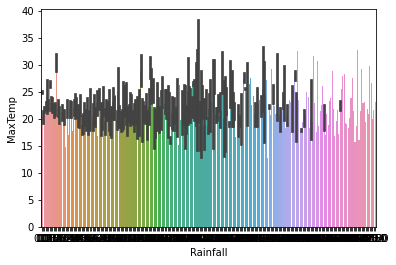

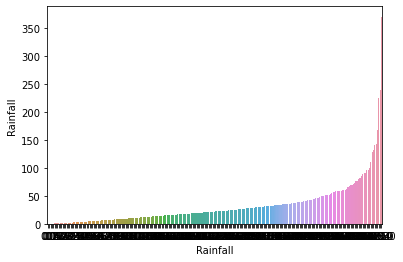

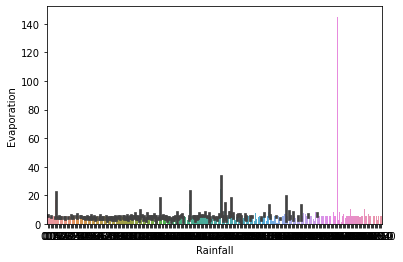

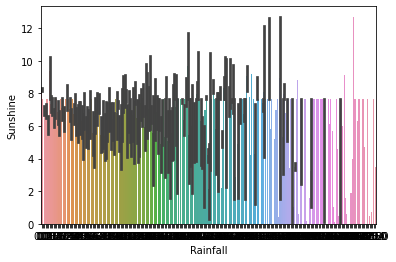

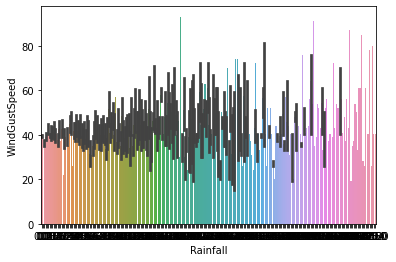

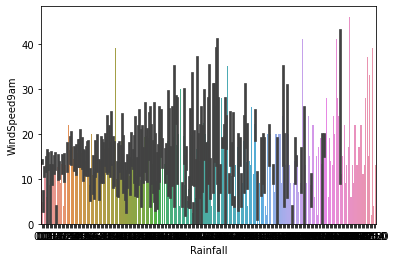

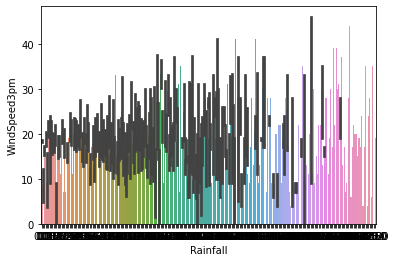

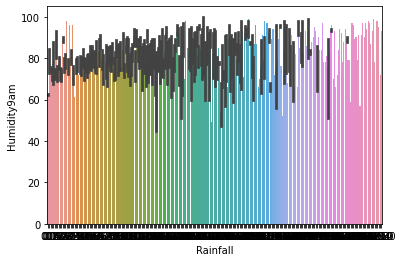

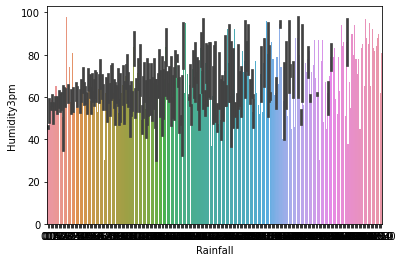

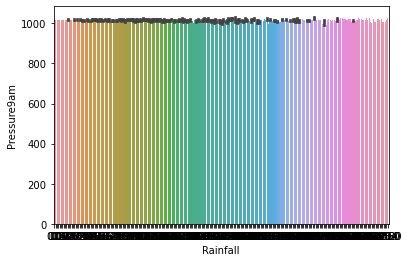

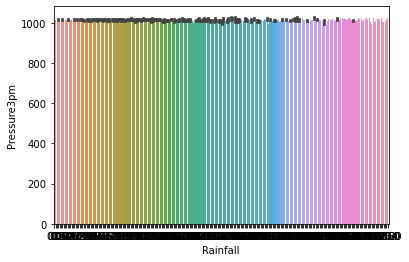

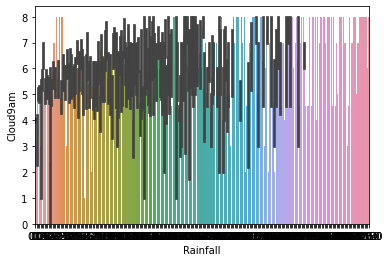

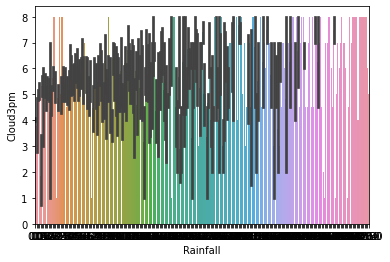

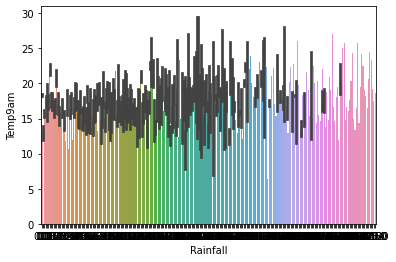

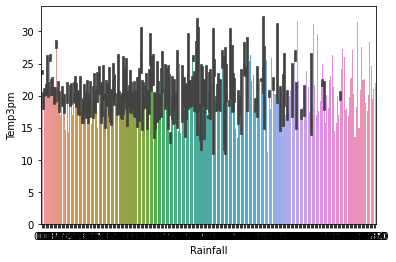

In [35]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = df['Rainfall'])
    plt.show()

In [ ]:
## box plot after removing the outliers

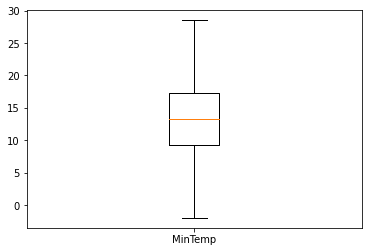

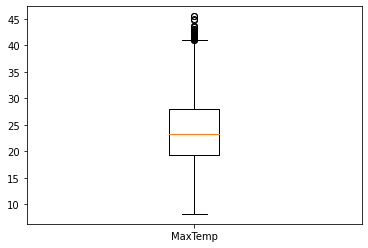

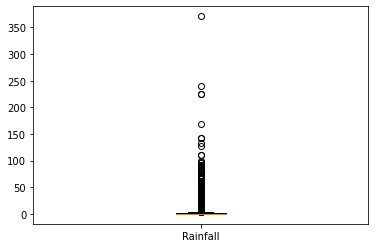

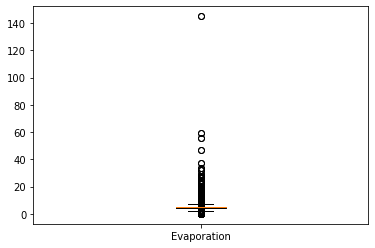

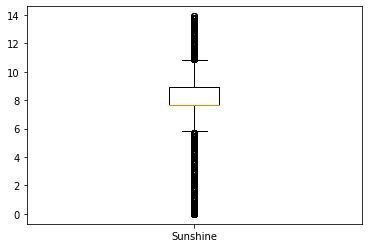

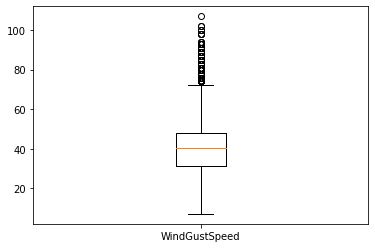

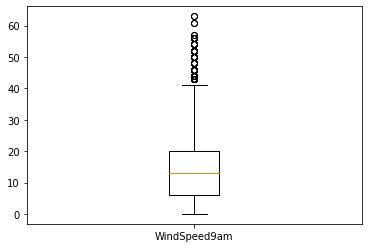

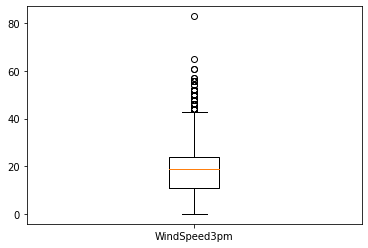

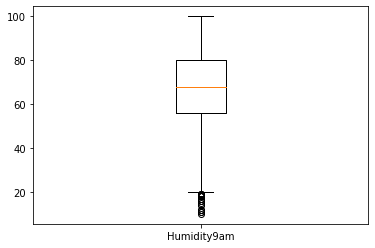

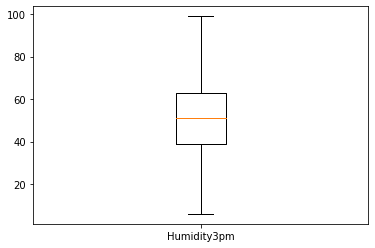

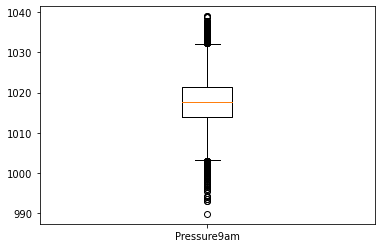

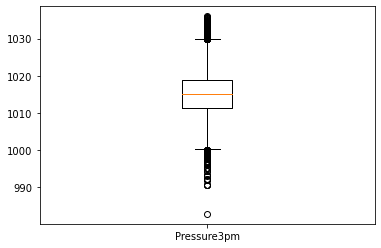

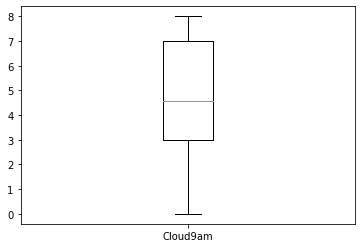

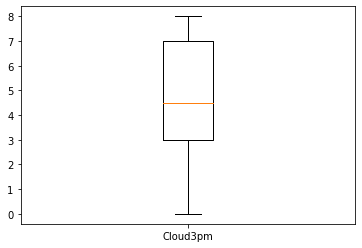

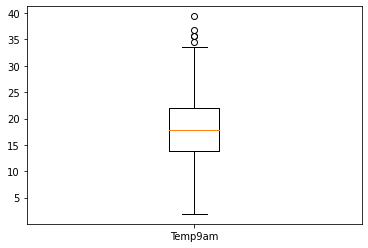

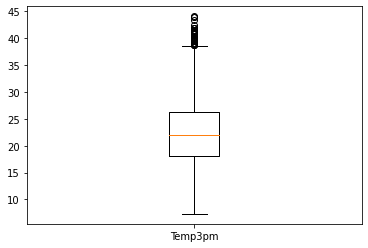

In [36]:
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [37]:
a=['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [ ]:
## histplot

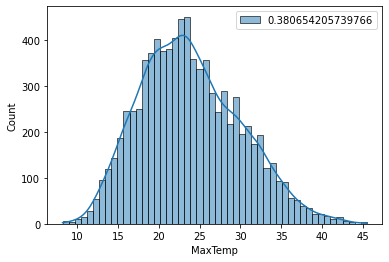

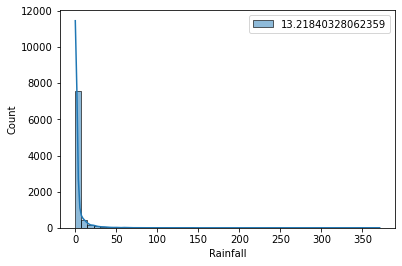

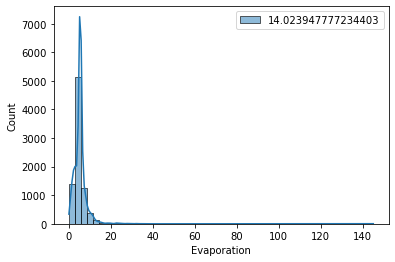

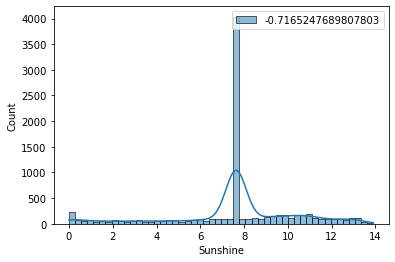

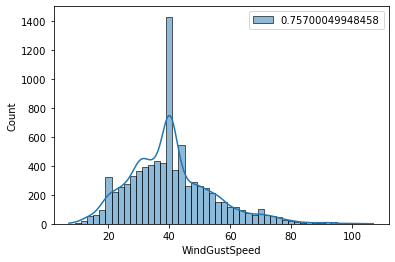

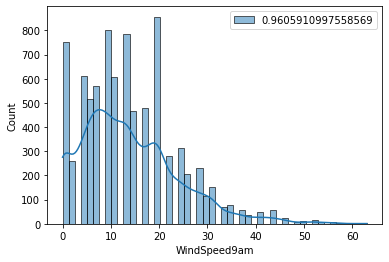

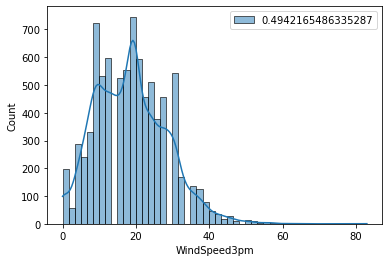

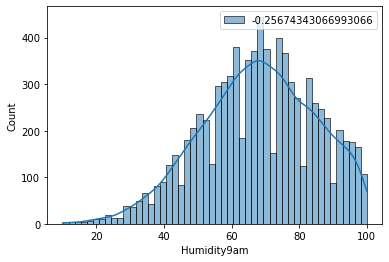

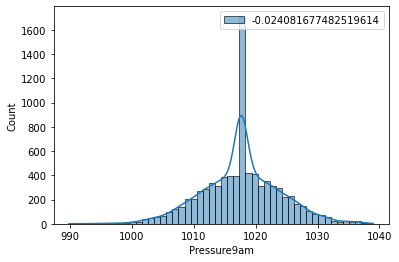

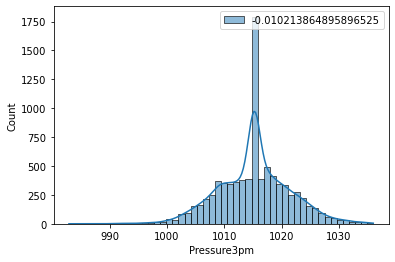

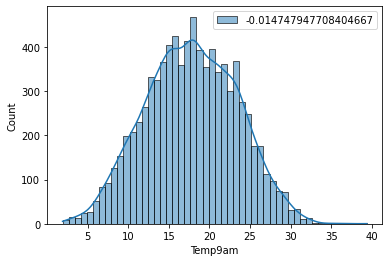

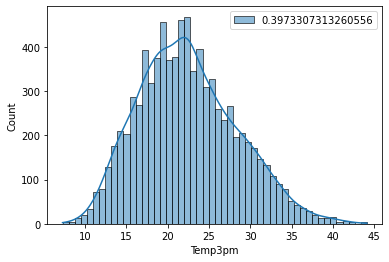

In [38]:
for i in a:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [ ]:
## iqr method to remove ouliers

In [39]:
out_vars=['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [40]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [42]:
cont_data.loc[:, out_vars] = cont_data.loc[:, out_vars].apply(outlierTreat)
cont_data.loc[:, out_vars]

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,1007.7,1007.1,16.9,21.8
1,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,1010.6,1007.8,17.2,24.3
2,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,1007.6,1008.7,21.0,23.2
3,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,1017.6,1012.8,18.1,26.5
4,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,1024.6,1020.3,10.1,22.4
8421,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,1023.5,1019.1,10.9,24.5
8422,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,1021.0,1016.8,12.5,26.1
8423,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,1019.4,1016.5,15.1,26.0


In [ ]:
##checking for ouliers

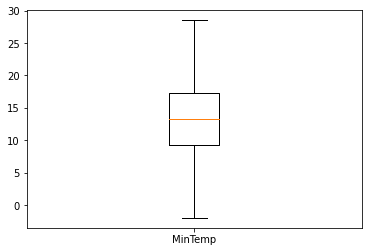

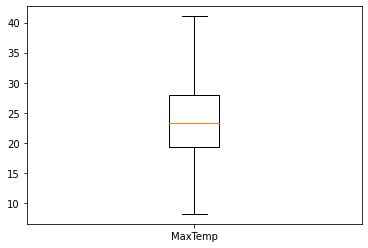

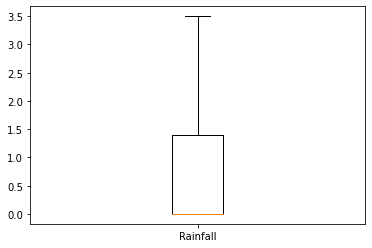

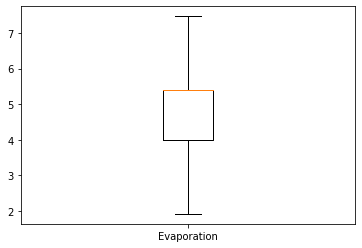

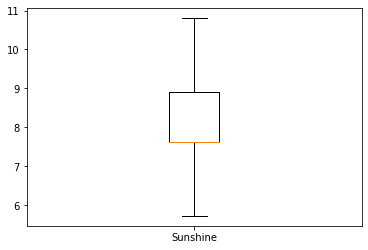

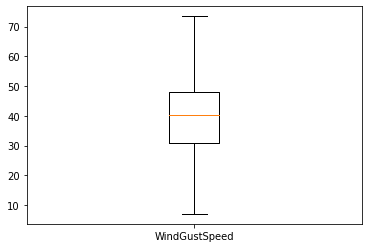

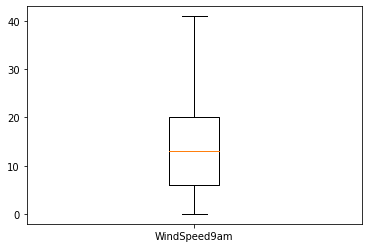

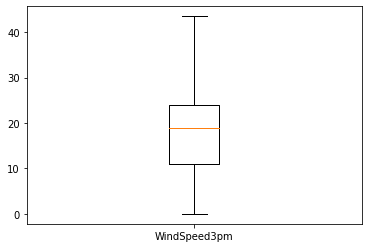

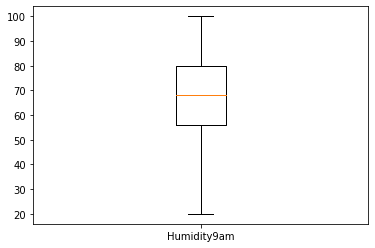

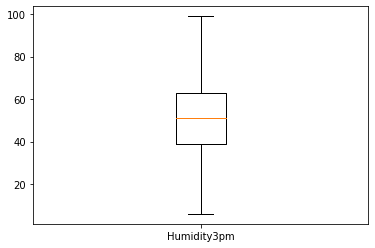

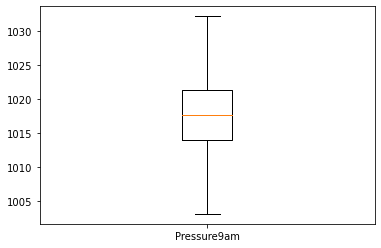

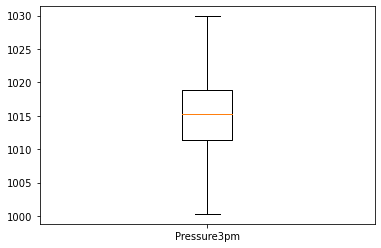

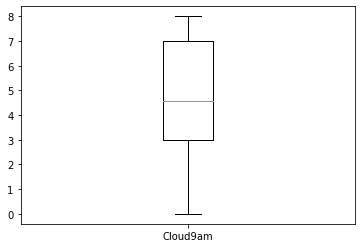

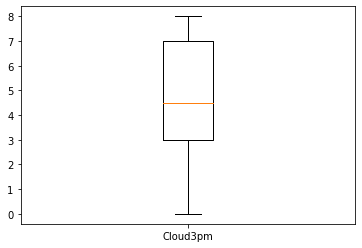

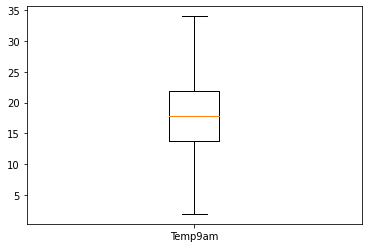

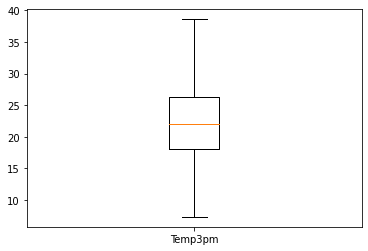

In [43]:
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [44]:
## outliers are removed

In [112]:
corr=cont_data.corr()

In [113]:
plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:>

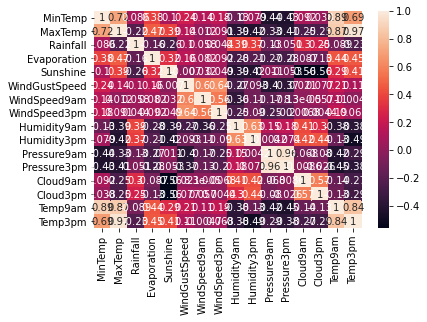

In [114]:
sns.heatmap(corr,annot=True)

In [115]:
cont_data=cont_data.drop(['Temp9am','MaxTemp','MinTemp','Pressure3pm','Temp9am','Temp3pm'],axis=1)
cont_data

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
0,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,8.000000,4.503183
1,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,4.566622,4.503183
2,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,4.566622,2.000000
3,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,4.566622,4.503183
4,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...
8420,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,4.566622,4.503183
8421,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,4.566622,4.503183
8422,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,4.566622,4.503183
8423,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,3.000000,2.000000


In [116]:
cat_vars = df.select_dtypes(include = ['object'])
cat_vars

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,E,SE,ENE,No,No
8421,2017-06-22,Uluru,NNW,SE,N,No,No
8422,2017-06-23,Uluru,N,SE,WNW,No,No
8423,2017-06-24,Uluru,SE,SSE,N,No,No


In [117]:
cat_vars.isnull().sum()

Date              0
Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [118]:
cat_vars=cat_vars.drop(['Date'],axis=1)
cat_vars

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


In [119]:
## removing the null values

In [120]:
cat_vars=cat_vars.fillna(cat_vars.mode().iloc[0])
cat_vars

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


In [121]:
cat_vars.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [127]:
cat_data = cat_vars.copy()
cat_data = pd.get_dummies(cat_vars, drop_first = True) ## numerical features to continuos features
cat_data

,Location_Albury,Location_Brisbane,Location_CoffsHarbour,Location_Darwin,Location_Melbourne,Location_Newcastle,Location_Penrith,Location_PerthAirport,Location_Uluru,Location_Williamtown,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8421,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8422,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8423,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Combining Numerical and Categorical data.
final_data = pd.concat([cont_data, cat_data], axis = 1)
final_data

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,8.000000,...,0,0,0,0,0,0,1,0,0,0
1,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,4.566622,...,0,0,0,0,0,0,0,1,0,0
2,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,4.566622,...,0,0,0,0,0,0,0,1,0,0
3,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,4.566622,...,0,0,0,0,0,0,0,0,0,0
4,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,7.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,4.566622,...,0,0,0,0,0,0,0,0,0,0
8421,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,4.566622,...,0,0,0,0,0,0,0,0,0,0
8422,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,4.566622,...,0,0,0,0,0,0,1,0,0,0
8423,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,3.000000,...,0,0,0,0,0,0,0,0,0,0


In [129]:
## correlation

In [130]:
corr=final_data.corr()

In [154]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

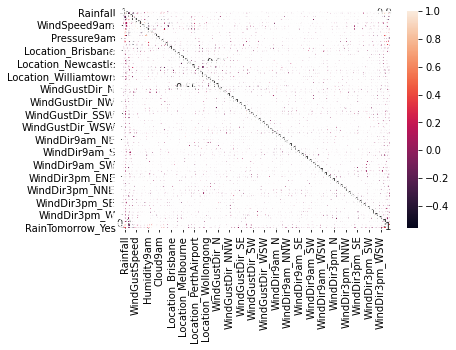

In [155]:
sns.heatmap(corr,annot=True)

In [133]:
## splitting the dependent and independent variables

In [135]:
x=final_data.drop(['Rainfall'],axis=1)
x

,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,8.000000,4.503183,...,0,0,0,0,0,0,1,0,0,0
1,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,4.566622,4.503183,...,0,0,0,0,0,0,0,1,0,0
2,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,4.566622,2.000000,...,0,0,0,0,0,0,0,1,0,0
3,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,4.566622,4.503183,...,0,0,0,0,0,0,0,0,0,0
4,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,4.566622,4.503183,...,0,0,0,0,0,0,0,0,0,0
8421,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,4.566622,4.503183,...,0,0,0,0,0,0,0,0,0,0
8422,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,4.566622,4.503183,...,0,0,0,0,0,0,1,0,0,0
8423,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,3.000000,2.000000,...,0,0,0,0,0,0,0,0,0,0


In [158]:
y=final_data['Rainfall']
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8425, dtype: float64

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
st=StandardScaler()

In [161]:
st.fit_transform(x)

array([[ 0.24373602, -0.22498136,  0.30230391, ..., -0.27190521,
        -0.55609919, -0.55628212],
       [ 0.24373602, -0.22498136,  0.30230391, ...,  3.67775231,
        -0.55609919, -0.55628212],
       [ 0.24373602, -0.22498136,  0.45333217, ...,  3.67775231,
        -0.55609919, -0.55628212],
       ...,
       [ 0.24373602, -0.22498136, -0.22629499, ..., -0.27190521,
        -0.55609919, -0.55628212],
       [ 0.24373602, -0.22498136, -0.90592215, ..., -0.27190521,
        -0.55609919, -0.55628212],
       [ 0.24373602, -0.22498136,  0.01342224, ..., -0.27190521,
        -0.55609919, -0.55628212]])

In [162]:
# feature selection

In [166]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()

In [167]:
model.fit(x,y)

ExtraTreesRegressor()

In [168]:
print(model.feature_importances_)

[6.06199710e-03 4.10326128e-03 8.17671419e-03 8.16451742e-03
 9.07377978e-03 1.28720454e-02 1.27432034e-02 1.02163905e-02
 1.45827244e-02 9.97257322e-03 1.49911578e-03 6.28423322e-04
 1.22042778e-03 2.38703594e-04 4.08472104e-03 6.22888524e-04
 1.02226280e-03 1.05187212e-03 4.21546559e-06 2.67659617e-03
 1.38305482e-03 9.90980108e-04 6.30660797e-04 1.78995468e-03
 1.03468730e-03 8.70547463e-04 8.10296911e-04 1.17820208e-03
 2.12751874e-03 1.66933475e-03 3.12800121e-03 1.65635614e-03
 2.14924698e-03 2.46474698e-03 1.91076197e-03 2.68417709e-03
 6.39273838e-04 9.16950965e-04 3.13756906e-03 1.03100740e-03
 1.34731194e-03 1.62999250e-03 1.86475484e-03 1.57768886e-03
 1.37332603e-03 2.11623022e-03 1.35780354e-03 2.18228117e-03
 1.43658741e-03 1.62541877e-03 2.72848333e-03 2.31985070e-03
 1.43972907e-03 2.09904001e-03 8.98285531e-04 2.06373870e-03
 1.63514677e-03 1.20627122e-03 2.89127240e-03 3.41043148e-03
 2.50879869e-03 1.97274776e-03 1.80243302e-03 1.02757231e-03
 1.50453543e-03 1.963497

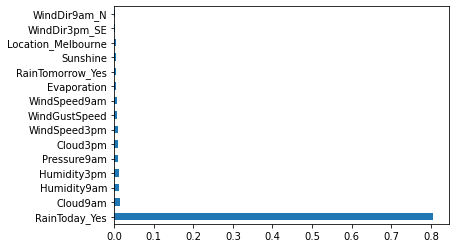

In [172]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [182]:
x_new1=pd.DataFrame(x['RainToday_Yes'])
x_new1

,RainToday_Yes
0,0
1,0
2,0
3,0
4,0
...,...
8420,0
8421,0
8422,0
8423,0


In [183]:
x_new2=pd.DataFrame(x['Cloud9am'])
x_new2

,Cloud9am
0,8.000000
1,4.566622
2,4.566622
3,4.566622
4,7.000000
...,...
8420,4.566622
8421,4.566622
8422,4.566622
8423,3.000000


In [185]:
x_new3=pd.DataFrame(x['Humidity9am'])
x_new3

,Humidity9am
0,71.0
1,44.0
2,38.0
3,45.0
4,82.0
...,...
8420,51.0
8421,56.0
8422,53.0
8423,51.0


In [186]:
x_new4=pd.DataFrame(x['Humidity3pm'])
x_new4

,Humidity3pm
0,22.0
1,25.0
2,30.0
3,16.0
4,33.0
...,...
8420,24.0
8421,21.0
8422,24.0
8423,24.0


In [187]:
x_new5=pd.DataFrame(x['Cloud3pm'])
x_new5

,Cloud3pm
0,4.503183
1,4.503183
2,2.000000
3,4.503183
4,8.000000
...,...
8420,4.503183
8421,4.503183
8422,4.503183
8423,2.000000


In [188]:
x_new6=pd.DataFrame(x['Pressure9am'])
x_new6

,Pressure9am
0,1007.7
1,1010.6
2,1007.6
3,1017.6
4,1010.8
...,...
8420,1024.6
8421,1023.5
8422,1021.0
8423,1019.4


In [189]:
x_new7=pd.DataFrame(x['WindSpeed9am'])
x_new7

,WindSpeed9am
0,20.0
1,4.0
2,19.0
3,11.0
4,7.0
...,...
8420,13.0
8421,13.0
8422,9.0
8423,13.0


In [190]:
x_new8=pd.DataFrame(x['WindSpeed3pm'])
x_new8

,WindSpeed3pm
0,24.0
1,22.0
2,26.0
3,9.0
4,20.0
...,...
8420,11.0
8421,9.0
8422,9.0
8423,7.0


In [191]:
x_new9=pd.DataFrame(x['WindGustSpeed'])
x_new9

,WindGustSpeed
0,44.000000
1,44.000000
2,46.000000
3,24.000000
4,41.000000
...,...
8420,31.000000
8421,22.000000
8422,37.000000
8423,28.000000


In [192]:
x_new_10=pd.DataFrame(x['Evaporation'])
x_new_10

,Evaporation
0,5.389395
1,5.389395
2,5.389395
3,5.389395
4,5.389395
...,...
8420,5.389395
8421,5.389395
8422,5.389395
8423,5.389395


In [194]:
# Combining Numerical and Categorical data.
x_new = pd.concat([x_new1,x_new2,x_new3,x_new4,x_new5,x_new6,x_new7,x_new8,x_new9,x_new_10], axis = 1)
x_new

,RainToday_Yes,Humidity9am,Humidity9am,Humidity3pm,Cloud3pm,Pressure9am,WindSpeed9am,WindSpeed3pm,WindGustSpeed,Evaporation
0,0,71.0,71.0,22.0,4.503183,1007.7,20.0,24.0,44.000000,5.389395
1,0,44.0,44.0,25.0,4.503183,1010.6,4.0,22.0,44.000000,5.389395
2,0,38.0,38.0,30.0,2.000000,1007.6,19.0,26.0,46.000000,5.389395
3,0,45.0,45.0,16.0,4.503183,1017.6,11.0,9.0,24.000000,5.389395
4,0,82.0,82.0,33.0,8.000000,1010.8,7.0,20.0,41.000000,5.389395
...,...,...,...,...,...,...,...,...,...,...
8420,0,51.0,51.0,24.0,4.503183,1024.6,13.0,11.0,31.000000,5.389395
8421,0,56.0,56.0,21.0,4.503183,1023.5,13.0,9.0,22.000000,5.389395
8422,0,53.0,53.0,24.0,4.503183,1021.0,9.0,9.0,37.000000,5.389395
8423,0,51.0,51.0,24.0,2.000000,1019.4,13.0,7.0,28.000000,5.389395


In [196]:
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8425, dtype: float64

In [ ]:
##Training the models

In [207]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [208]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=41,test_size=0.25)

In [210]:
## knearestNeighbors

In [211]:
kn=KNeighborsRegressor()

In [212]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [213]:
y_pred=kn.predict(x_test)

In [214]:
mean_absolute_error(y_test,y_pred)

0.7920012942285359

In [215]:
mean_squared_error(y_test,y_pred)

1.3930879665000782

In [216]:
r2_score(y_test,y_pred)

0.24702277069009237

In [217]:
## svr

In [218]:
sv=SVR()

In [219]:
sv.fit(x_train,y_train)

SVR()

In [220]:
y_pred=sv.predict(x_test)

In [221]:
mean_absolute_error(y_test,y_pred)

0.8307197300718129

In [222]:
r2_score(y_test,y_pred)

-0.1333155254272731

In [ ]:
## decisiontreeRegressor

In [223]:
dt=DecisionTreeRegressor()

In [224]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [225]:
y_pred=dt.predict(x_test)

In [226]:
mean_absolute_error(y_test,y_pred)

0.25056081970004646

In [227]:
r2_score(y_test,y_pred)

0.7606819139564659

In [228]:
mean_squared_error(y_test,y_pred)

0.44276391483793703

In [229]:
rf=RandomForestRegressor()

In [230]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [231]:
y_pred=rf.predict(x_test)

In [232]:
mean_absolute_error(y_test,y_pred)

0.2800035593821739

In [233]:
r2_score(y_test,y_pred)

0.8606769348483123

In [234]:
mean_squared_error(y_test,y_pred)

0.25776248997144646

In [235]:
##GradientBoostingRegressor

In [236]:
gb=GradientBoostingRegressor()

In [237]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [238]:
y_pred=gb.predict(x_test)

In [239]:
mean_absolute_error(y_test,y_pred)

0.3386004789382708

In [240]:
mean_squared_error(y_test,y_pred)

0.35320615858548715

In [241]:
r2_score(y_test,y_pred)

0.8090887287361541

In [242]:
## randomforestregressor working is fine

In [243]:
from sklearn.model_selection import RandomizedSearchCV

In [244]:
params={'n_estimators':[100,200,300,400,500,600,700],'min_samples_split':[1,2,3,4],'min_samples_leaf':[1,2,3,4],'max_depth':[None,1,2,3,4,5,6,7,8]}

In [245]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)

In [246]:
g.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]})

In [247]:
g.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [248]:
m=RandomForestRegressor(n_estimators=300 ,
 min_samples_split=4 ,
 min_samples_leaf=1,
 max_depth=None)

In [249]:
m.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [250]:
y_test=m.predict(x_test)

In [251]:
mean_absolute_error(y_test,y_pred)

0.14525713881890298

In [252]:
mean_squared_error(y_test,y_pred)

0.061485532522505854

In [253]:
r2_score(y_test,y_pred)

0.9602430200640046

In [254]:
## evaluating the model

In [255]:
import numpy as np

In [260]:
a=np.array(y_test)
a

array([2.35436984, 0.33636027, 0.18776245, ..., 3.09962222, 0.08180406,
       3.16904603])

In [261]:
predicted=np.array(m.predict(x_test))
predicted

array([2.35436984, 0.33636027, 0.18776245, ..., 3.09962222, 0.08180406,
       3.16904603])

In [258]:
df_com=pd.DataFrame({'actual':a,'pred':predicted},index=range(len(a)))

In [259]:
df_com

,actual,pred
0,2.354370,2.354370
1,0.336360,0.336360
2,0.187762,0.187762
3,0.071039,0.071039
4,0.029098,0.029098
...,...,...
2102,0.047858,0.047858
2103,0.030150,0.030150
2104,3.099622,3.099622
2105,0.081804,0.081804


In [262]:
## classifier

In [263]:
x_new

,RainToday_Yes,Humidity9am,Humidity9am,Humidity3pm,Cloud3pm,Pressure9am,WindSpeed9am,WindSpeed3pm,WindGustSpeed,Evaporation
0,0,71.0,71.0,22.0,4.503183,1007.7,20.0,24.0,44.000000,5.389395
1,0,44.0,44.0,25.0,4.503183,1010.6,4.0,22.0,44.000000,5.389395
2,0,38.0,38.0,30.0,2.000000,1007.6,19.0,26.0,46.000000,5.389395
3,0,45.0,45.0,16.0,4.503183,1017.6,11.0,9.0,24.000000,5.389395
4,0,82.0,82.0,33.0,8.000000,1010.8,7.0,20.0,41.000000,5.389395
...,...,...,...,...,...,...,...,...,...,...
8420,0,51.0,51.0,24.0,4.503183,1024.6,13.0,11.0,31.000000,5.389395
8421,0,56.0,56.0,21.0,4.503183,1023.5,13.0,9.0,22.000000,5.389395
8422,0,53.0,53.0,24.0,4.503183,1021.0,9.0,9.0,37.000000,5.389395
8423,0,51.0,51.0,24.0,2.000000,1019.4,13.0,7.0,28.000000,5.389395


In [264]:
from sklearn.preprocessing import LabelEncoder

In [265]:
lb=LabelEncoder()

In [269]:
e=lb.fit_transform(cat_vars['RainTomorrow'])

In [271]:
y=pd.Series(e)

In [272]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Length: 8425, dtype: int32

In [273]:
from sklearn.model_selection import train_test_split,cross_val_score
#importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.30,random_state=41)

In [275]:
kn=KNeighborsClassifier()

In [276]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [277]:
y_pred=kn.predict(x_test)

In [285]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [286]:
accuracy_score(y_test,y_pred)

0.8263449367088608

In [287]:
confusion_matrix(y_test,y_pred)

array([[1810,  123],
       [ 316,  279]], dtype=int64)

In [288]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.94      0.89      1933\n           1       0.69      0.47      0.56       595\n\n    accuracy                           0.83      2528\n   macro avg       0.77      0.70      0.73      2528\nweighted avg       0.81      0.83      0.81      2528\n'

In [289]:
roc_auc_score(y_test,y_pred)

0.7026379511970334

In [290]:
cross_val_score(kn,x,y,cv=10).mean()

0.8262392822827647

In [291]:
## SVM

In [292]:
sv=SVC()

In [293]:
sv.fit(x_train,y_train)

SVC()

In [294]:
y_pred=sv.predict(x_test)

In [295]:
accuracy_score(y_test,y_pred)

0.7646360759493671

In [296]:
confusion_matrix(y_test,y_pred)

array([[1933,    0],
       [ 595,    0]], dtype=int64)

In [297]:
roc_auc_score(y_test,y_pred)

0.5

In [299]:
cross_val_score(sv,x,y,cv=10).mean()

0.763679512430157

In [300]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.87      1933\n           1       0.00      0.00      0.00       595\n\n    accuracy                           0.76      2528\n   macro avg       0.38      0.50      0.43      2528\nweighted avg       0.58      0.76      0.66      2528\n'

In [301]:
## Decision tree classifier

In [302]:
dt=DecisionTreeClassifier()

In [303]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [304]:
y_pred=dt.predict(x_test)

In [305]:
accuracy_score(y_test,y_pred)

0.8326740506329114

In [306]:
confusion_matrix(y_test,y_pred)

array([[1721,  212],
       [ 211,  384]], dtype=int64)

In [307]:
roc_auc_score(y_test,y_pred)

0.7678520347611367

In [308]:
cross_val_score(dt,x,y,cv=10).mean()

1.0

In [309]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89      1933\n           1       0.64      0.65      0.64       595\n\n    accuracy                           0.83      2528\n   macro avg       0.77      0.77      0.77      2528\nweighted avg       0.83      0.83      0.83      2528\n'

In [310]:
## randomforestclassifier

In [311]:
rf=RandomForestClassifier()

In [312]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [313]:
y_pred=rf.predict(x_test)

In [314]:
accuracy_score(y_test,y_pred)

0.8833069620253164

In [315]:
confusion_matrix(y_test,y_pred)

array([[1868,   65],
       [ 230,  365]], dtype=int64)

In [316]:
roc_auc_score(y_test,y_pred)

0.7899094454129297

In [317]:
cross_val_score(rf,x,y,cv=10).mean()

1.0

In [318]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.93      1933\n           1       0.85      0.61      0.71       595\n\n    accuracy                           0.88      2528\n   macro avg       0.87      0.79      0.82      2528\nweighted avg       0.88      0.88      0.88      2528\n'

In [319]:
## gradientBoostingClassifier

In [320]:
gb=GradientBoostingClassifier()

In [321]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [322]:
y_pred=gb.predict(x_test)

In [323]:
accuracy_score(y_test,y_pred)

0.8409810126582279

In [324]:
confusion_matrix(y_test,y_pred)

array([[1849,   84],
       [ 318,  277]], dtype=int64)

In [325]:
roc_auc_score(y_test,y_pred)

0.7110452251257463

In [326]:
cross_val_score(gb,x,y,cv=10).mean()

1.0

In [328]:
## random forest classifier is working fine

In [329]:
## hyperparamter tuning

In [330]:
params={'n_estimators':[100,200,300,400,500,600,700],'min_samples_split':[1,2,3,4],'min_samples_leaf':[1,2,3,4],'max_depth':[None,1,2,3,4,5,6,7,8]}

In [334]:
g=RandomizedSearchCV(RandomForestClassifier(),params,cv=10)

In [335]:
g.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]})

In [336]:
g.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [337]:
m=RandomForestClassifier(n_estimators=500 ,
 min_samples_split=2 ,
 min_samples_leaf=1,
 max_depth=None)

In [338]:
m.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [339]:
y_test=m.predict(x_test)

In [340]:
accuracy_score(y_test,y_pred)

0.9228639240506329

In [341]:
confusion_matrix(y_test,y_pred)

array([[2037,   65],
       [ 130,  296]], dtype=int64)

In [342]:
roc_auc_score(y_test,y_pred)

0.8319563751044166

In [343]:
cross_val_score(m,x,y,cv=10).mean()

1.0

In [344]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.95      2102\n           1       0.82      0.69      0.75       426\n\n    accuracy                           0.92      2528\n   macro avg       0.88      0.83      0.85      2528\nweighted avg       0.92      0.92      0.92      2528\n'

In [345]:
## evaluating the model

In [346]:
b=np.array(y_test)
b

array([1, 0, 0, ..., 0, 0, 0])

In [347]:
predicted=np.array(m.predict(x_test))
predicted

array([1, 0, 0, ..., 0, 0, 0])

In [350]:
df_com_=pd.DataFrame({'actual':b,'pred':predicted},index=range(len(b)))
df_com_

,actual,pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2523,0,0
2524,0,0
2525,0,0
2526,0,0


In [351]:
## saving the model

In [352]:
import pickle

In [353]:
filename='WEATHER_FORECASTING_PREDICTION'

In [355]:
pickle.dump(m,open(filename,'wb'))